<a href="https://www.kaggle.com/code/devilbornfire/airline-loyalty-campaign?scriptVersionId=156595373" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
#module for dataset

import numpy as np
#module for numerical work

import matplotlib.pyplot as plt
#module for Gui

import seaborn as sns
#module for Gui

import plotly.express as px
#module for graphs

from sklearn.model_selection import train_test_split
#for splitting the dataset

from sklearn.linear_model import LinearRegression
#algorithm for regression

from sklearn.linear_model import LogisticRegression
#algorithm for classification

from sklearn.ensemble import RandomForestClassifier
#algorithm for classification

from sklearn.metrics import mean_squared_error
#for checking error in the model

from sklearn.metrics import mean_absolute_error
#for checking absolute error in the model

from sklearn.metrics import accuracy_score 
#for checking accuracy score in the model



In [2]:
#Running the dataset
air = pd.read_csv("/kaggle/input/airline-loyalty-campaign-program-impact-on-flights/Customer Flight Activity.csv")
air

Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0               100018  2017      1               3                        0   
1               100102  2017      1              10                        4   
2               100140  2017      1               6                        0   
3               100214  2017      1               0                        0   
4               100272  2017      1               0                        0   
...                ...   ...    ...             ...                      ...   
405619          999902  2018     12               0                        0   
405620          999911  2018     12               0                        0   
405621          999940  2018     12               3                        0   
405622          999982  2018     12               0                        0   
405623          999986  2018     12               0                        0   

        Total Flights  Distance  Points Accumulated  Points Redeemed  \
0                   3      1521               152.0                0   
1                  14      2030               203.0                0   
2                   6      1200               120.0                0   
3                   0         0                 0.0                0   
4                   0         0                 0.0                0   
...               ...       ...                 ...              ...   
405619              0         0                 0.0                0   
405620              0         0                 0.0                0   
405621              3      1233               123.0                0   
405622              0         0                 0.0                0   
405623              0         0                 0.0                0   

        Dollar Cost Points Redeemed  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0  
...                             ...  
405619                            0  
405620                            0  
405621                            0  
405622                            0  
405623                            0  

[405624 rows x 10 columns]

Problem Statement:
The dataset shows the airline report of the various customers from different countries and we will use different regression and classification algorithms on the dataset to predict the perfect impact on the customers and on the airlines in thier loyalty campaign.

In [3]:
#Identifying the dataset
air.head()

Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   
3          100214  2017      1               0                        0   
4          100272  2017      1               0                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   
3              0         0                 0.0                0   
4              0         0                 0.0                0   

   Dollar Cost Points Redeemed  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0

In [4]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [5]:
air.describe()

Loyalty Number           Year          Month  Flights Booked  \
count   405624.000000  405624.000000  405624.000000   405624.000000   
mean    550037.873084    2017.500000       6.500000        4.115052   
std     258935.286969       0.500001       3.452057        5.225518   
min     100018.000000    2017.000000       1.000000        0.000000   
25%     326961.000000    2017.000000       3.750000        0.000000   
50%     550834.000000    2017.500000       6.500000        1.000000   
75%     772194.000000    2018.000000       9.250000        8.000000   
max     999986.000000    2018.000000      12.000000       21.000000   

       Flights with Companions  Total Flights       Distance  \
count            405624.000000  405624.000000  405624.000000   
mean                  1.031805       5.146858    1208.880059   
std                   2.076869       6.521227    1433.155320   
min                   0.000000       0.000000       0.000000   
25%                   0.000000       0.000000       0.000000   
50%                   0.000000       1.000000     488.000000   
75%                   1.000000      10.000000    2336.000000   
max                  11.000000      32.000000    6293.000000   

       Points Accumulated  Points Redeemed  Dollar Cost Points Redeemed  
count       405624.000000    405624.000000                405624.000000  
mean           123.692721        30.696872                     2.484503  
std            146.599831       125.486049                    10.150038  
min              0.000000         0.000000                     0.000000  
25%              0.000000         0.000000                     0.000000  
50%             50.000000         0.000000                     0.000000  
75%            239.000000         0.000000                     0.000000  
max            676.500000       876.000000                    71.000000

In [6]:
air.shape

(405624, 10)

In [7]:
air.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [8]:
air.isna().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [9]:
air.duplicated().sum()

1864

Dataset:
The dataset contains a large number of observations with 405624 rows and 10 columns almost covers everything related to the problem now we will be using some plots for better understanding of the dataset so that we could solve the problem with more accuracy.

Heatmap


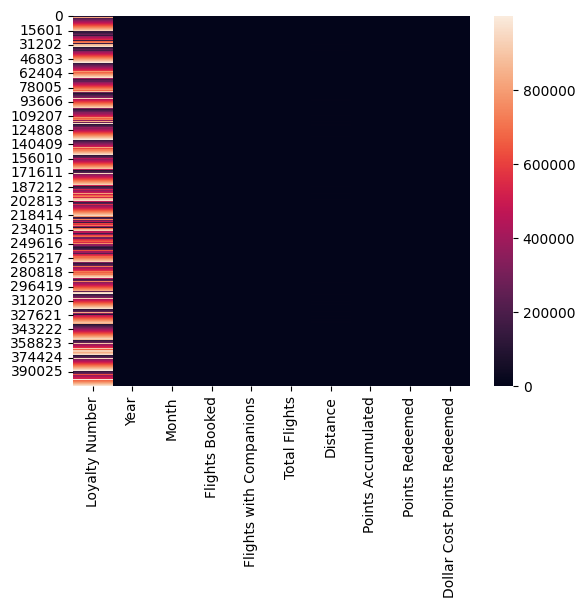

In [10]:
#plotting heatmap using seaborn
sns.heatmap(air)
print("Heatmap")
plt.show()


Histogram of the data


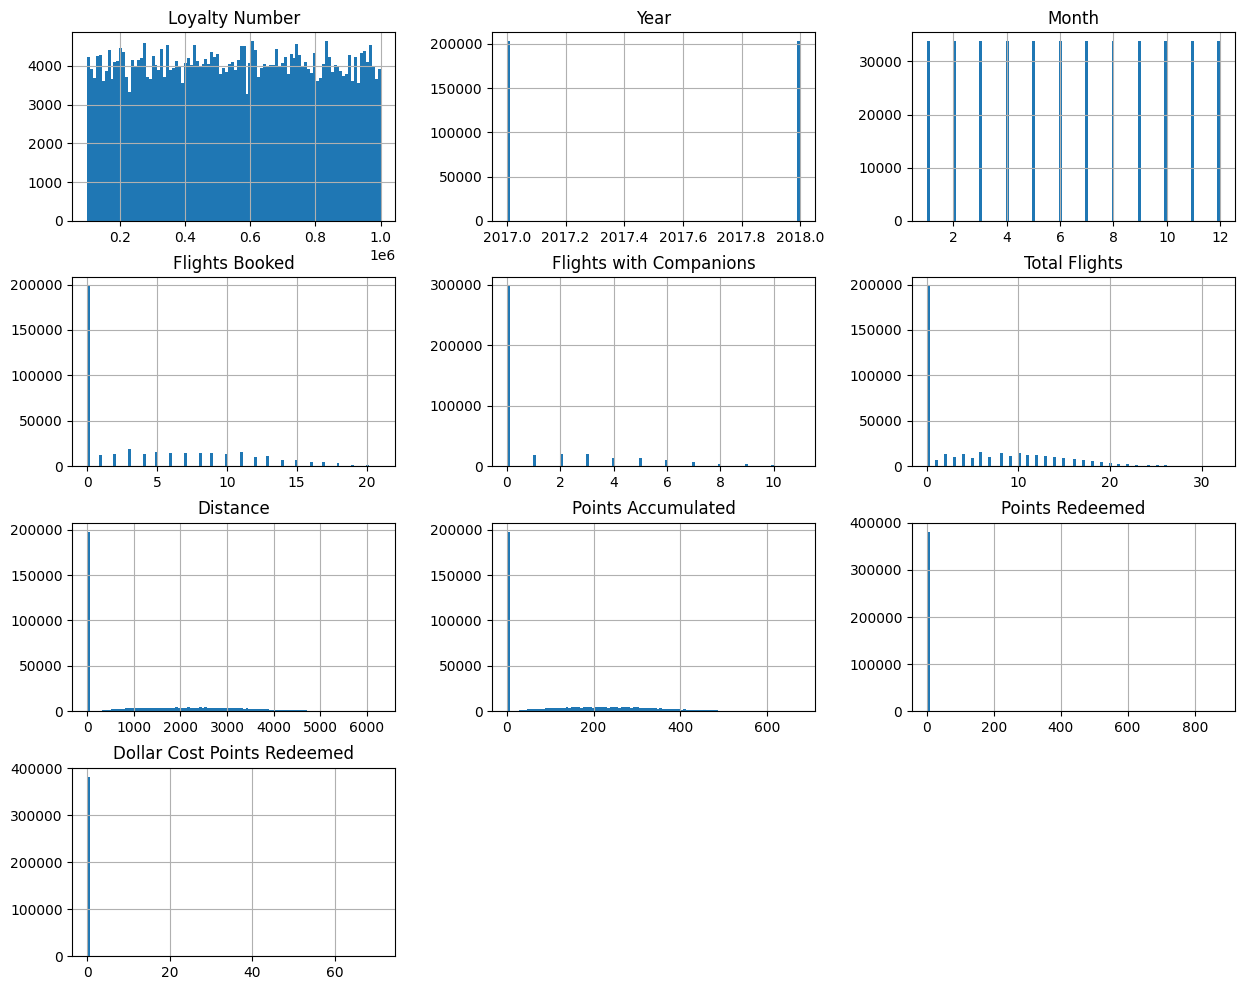

In [11]:
#plotting histogram of the data
air.hist(bins = 100,figsize=(15,12))
print("Histogram of the data")
plt.show()

Pairplot of the data


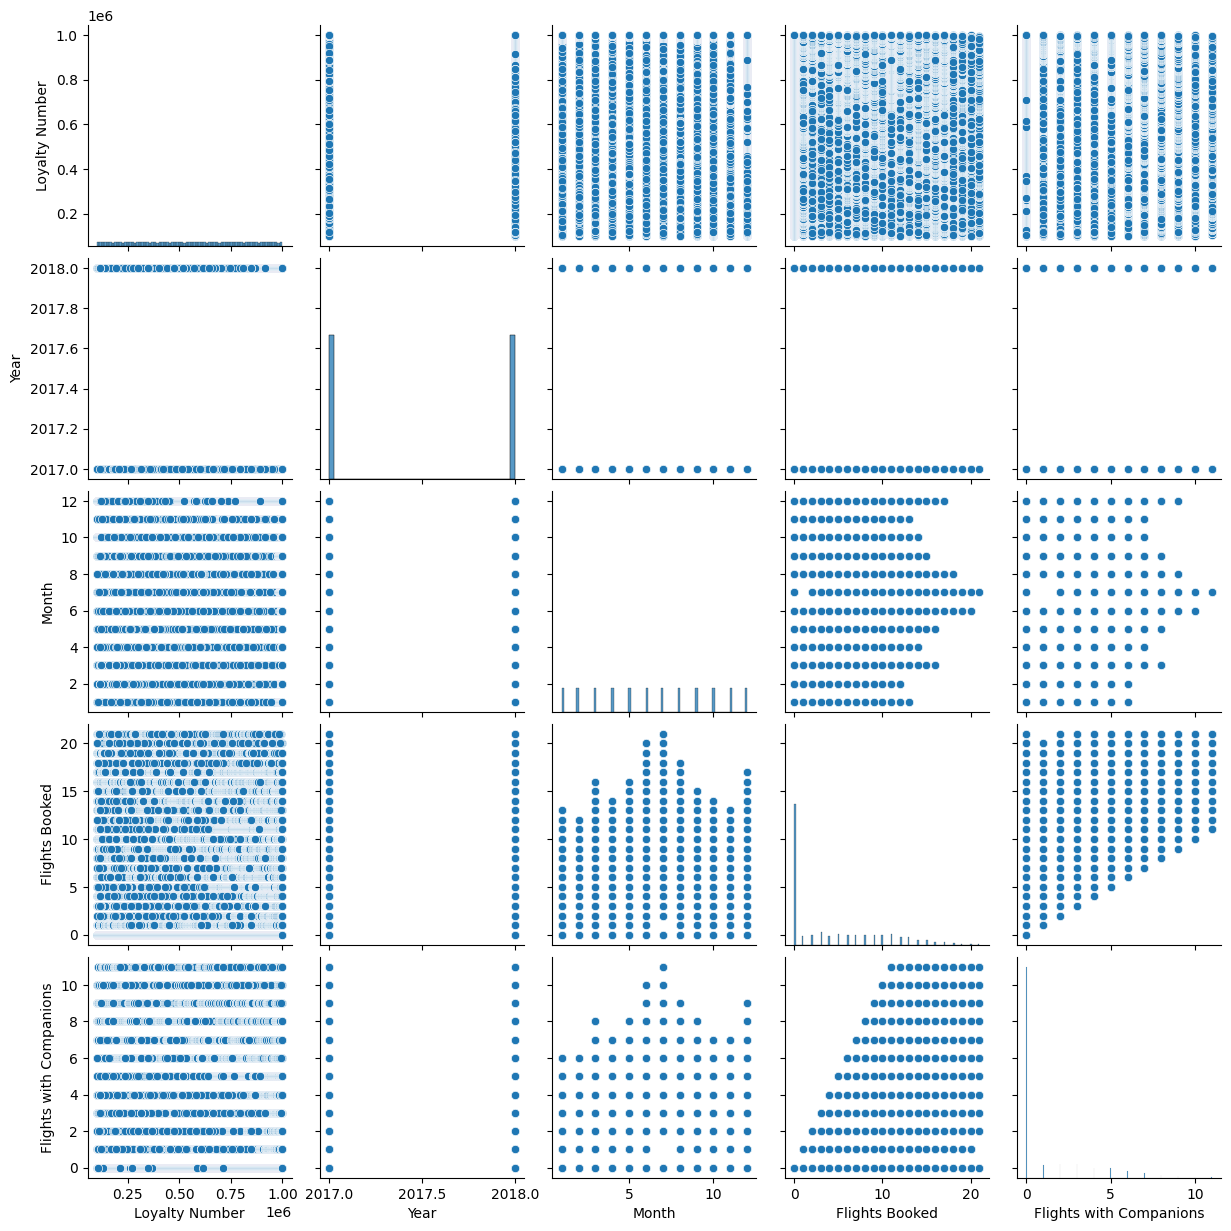

In [12]:
#plotting pairplot
sns.pairplot(air.iloc[:,:5])
print("Pairplot of the data")
plt.show()             

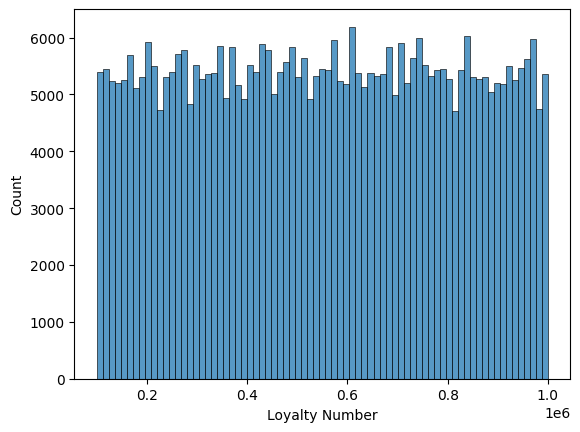

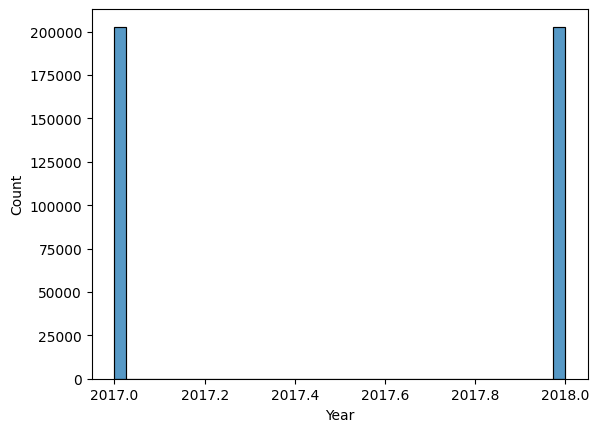

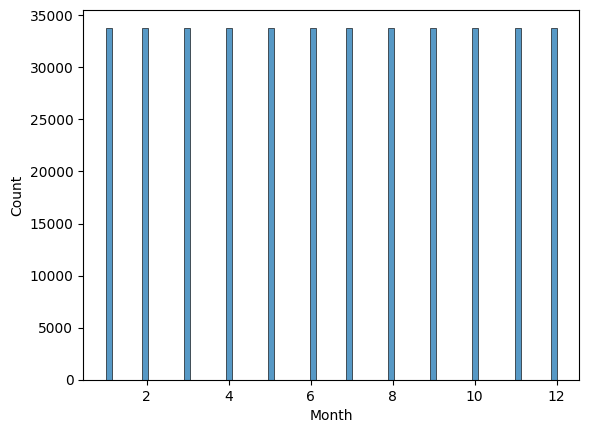

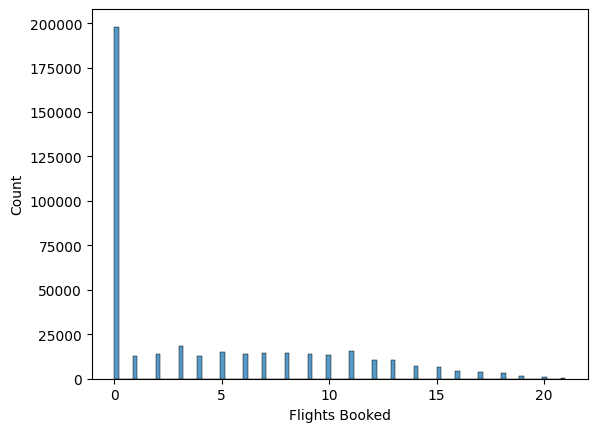

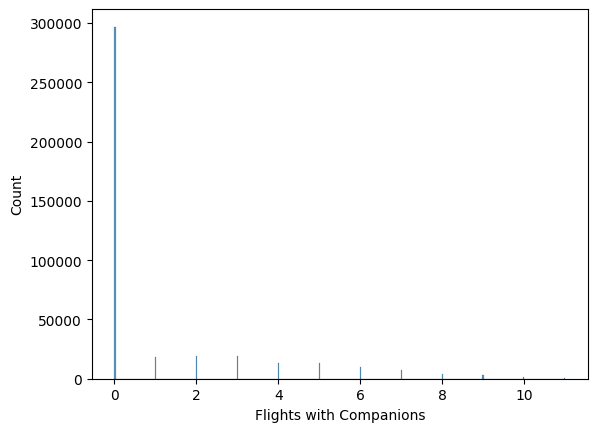

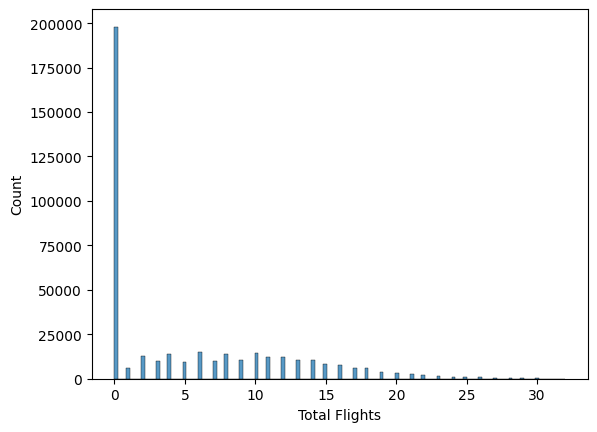

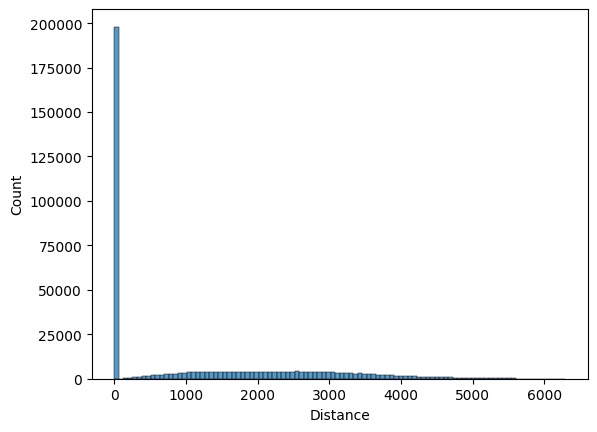

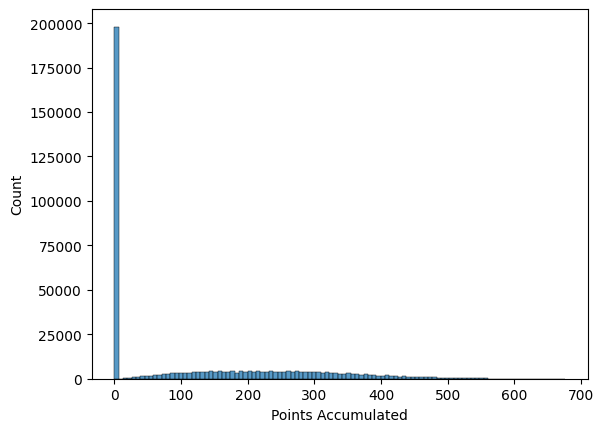

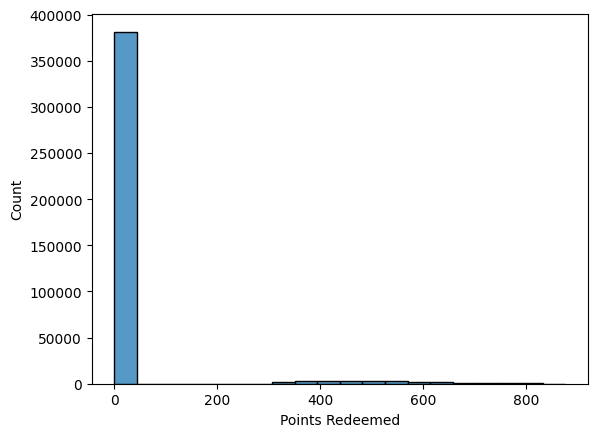

In [13]:
#plotting histplot using seaborn
sns.histplot(air['Loyalty Number'])
plt.show()

sns.histplot(air['Year'])
plt.show()

sns.histplot(air['Month'])
plt.show()

sns.histplot(air['Flights Booked'])
plt.show()

sns.histplot(air['Flights with Companions'])
plt.show()
 
sns.histplot(air['Total Flights'])
plt.show()    

sns.histplot(air['Distance'])
plt.show()

sns.histplot(air['Points Accumulated'])
plt.show()


sns.histplot(air['Points Redeemed'])
plt.show()

/tmp/ipykernel_42/1899071076.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(air['Loyalty Number'])


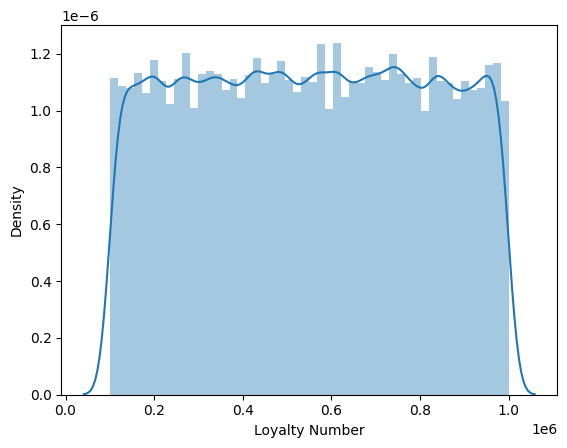

/tmp/ipykernel_42/1899071076.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(air['Year'])


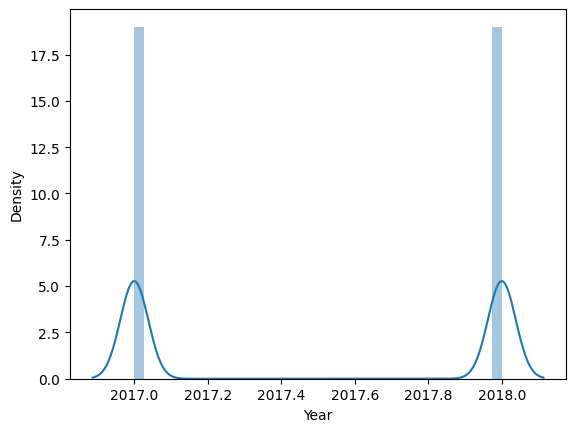

In [14]:
#plotting distplot usimg seaborn 
sns.distplot(air['Loyalty Number'])
plt.show()

sns.distplot(air['Year'])
plt.show()

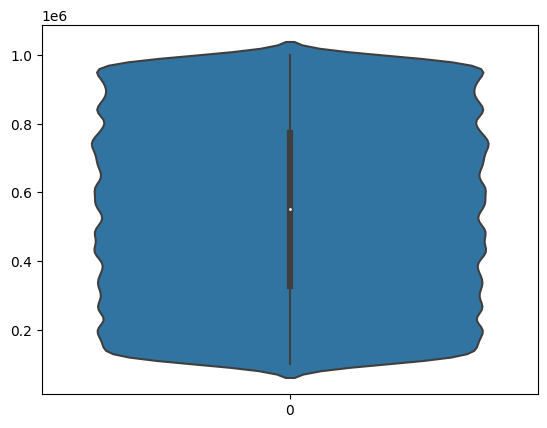

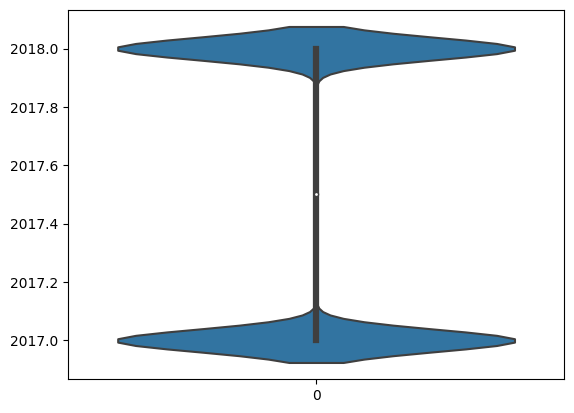

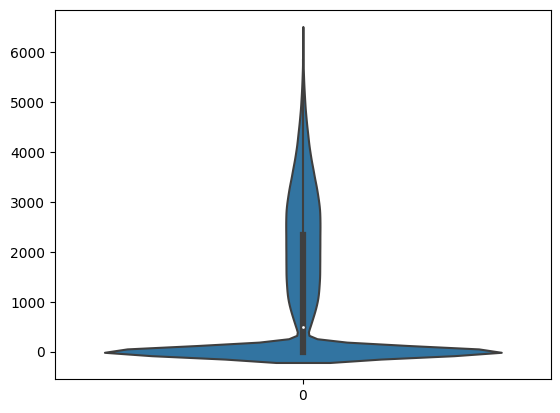

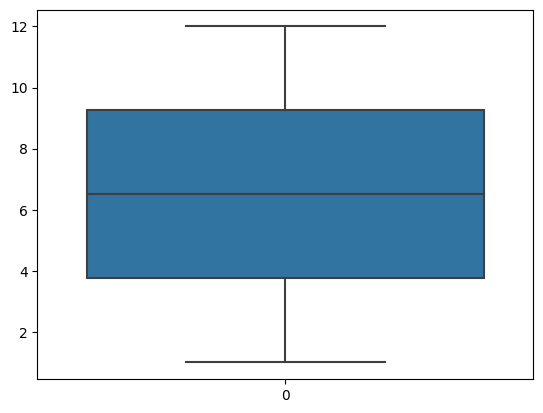

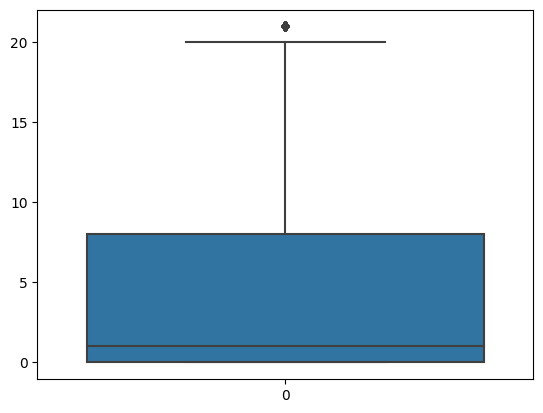

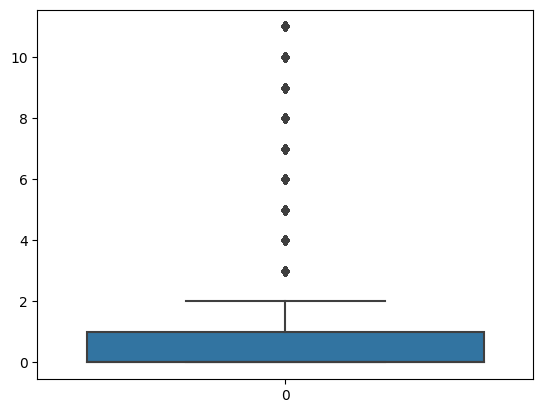

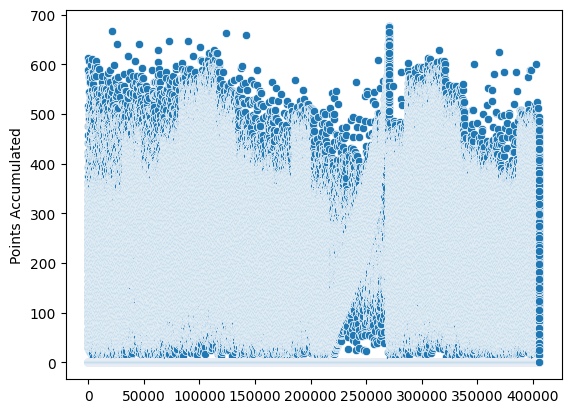

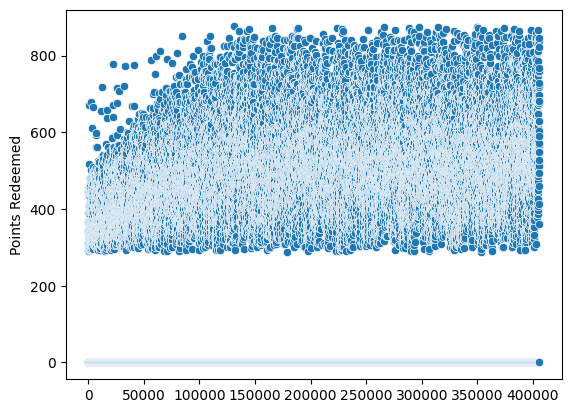

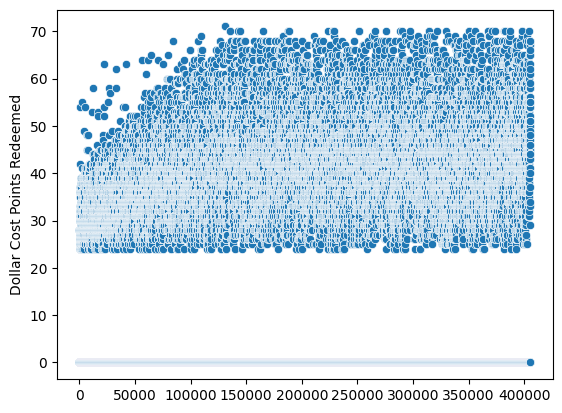

In [15]:
#plotting violinplots using seaborn 
sns.violinplot(air['Loyalty Number'])
plt.show()

sns.violinplot(air['Year'])
plt.show()

sns.violinplot(air['Distance'])
plt.show()
#plotting boxplots using seaborn 

sns.boxplot(air['Month'])
plt.show()

sns.boxplot(air['Flights Booked'])
plt.show()

sns.boxplot(air['Flights with Companions'])      
plt.show()          
#plotting scatter plots using Seaborn
sns.scatterplot(air['Points Accumulated'])
plt.show()                  
    
sns.scatterplot(air['Points Redeemed'])
plt.show()

sns.scatterplot(air['Dollar Cost Points Redeemed'])
plt.show()

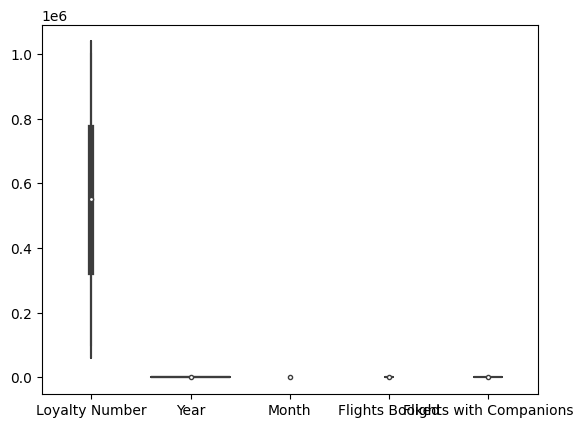

In [16]:
sns.violinplot(air.iloc[:,:5])
plt.show()            

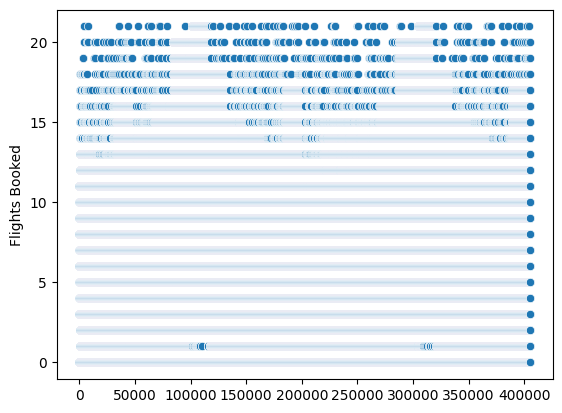

In [17]:
sns.scatterplot(air.iloc[:,3])
plt.show()

/tmp/ipykernel_42/910575779.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(air)


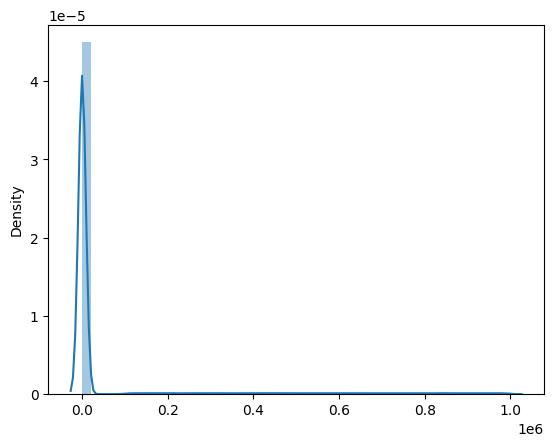

In [18]:
sns.distplot(air)
plt.show()

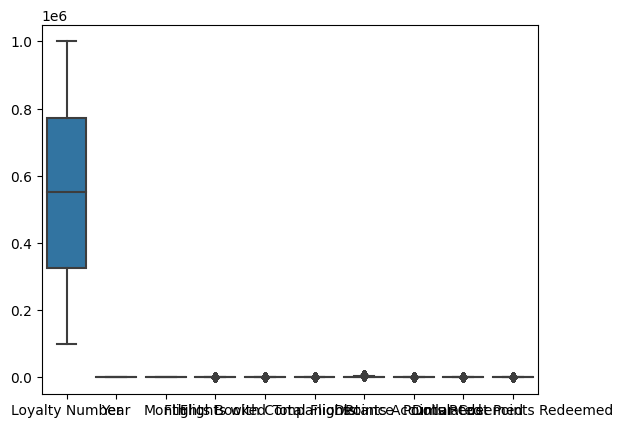

In [19]:
sns.boxplot(air)
plt.show()

In [20]:
#Value_counts()
air["Loyalty Number"].value_counts()


Loyalty Number
678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: count, Length: 16737, dtype: int64

In [21]:
air["Year"].value_counts()

Year
2017    202812
2018    202812
Name: count, dtype: int64

In [22]:
air["Month"].value_counts()

Month
1     33802
9     33802
2     33802
3     33802
11    33802
4     33802
5     33802
7     33802
6     33802
8     33802
10    33802
12    33802
Name: count, dtype: int64

In [23]:
air["Flights Booked"].value_counts()

Flights Booked
0     197992
3      18228
11     15705
5      15084
7      14561
8      14357
9      14164
6      13847
2      13641
10     13363
4      12821
1      12667
13     10782
12     10382
14      7057
15      6582
16      4354
17      3899
18      2958
19      1496
20      1156
21       528
Name: count, dtype: int64

In [24]:
air["Distance"].value_counts()

Distance
0       197992
2520       410
2880       401
1680       389
2160       365
         ...  
1333         1
3722         1
3985         1
4779         1
4135         1
Name: count, Length: 4746, dtype: int64

In [25]:
air["Flights Booked"].value_counts()

Flights Booked
0     197992
3      18228
11     15705
5      15084
7      14561
8      14357
9      14164
6      13847
2      13641
10     13363
4      12821
1      12667
13     10782
12     10382
14      7057
15      6582
16      4354
17      3899
18      2958
19      1496
20      1156
21       528
Name: count, dtype: int64

In [26]:
air["Flights with Companions"].value_counts()

Flights with Companions
0     296887
2      19272
3      19015
1      17905
4      13665
5      13424
6       9911
7       7089
8       3965
9       2944
10      1071
11       476
Name: count, dtype: int64

In [27]:
air["Points Redeemed"].value_counts()

Points Redeemed
0      381443
447       103
523       100
443        98
516        97
        ...  
834         1
858         1
862         1
869         1
859         1
Name: count, Length: 587, dtype: int64

In [28]:
air["Points Accumulated"].value_counts()

Points Accumulated
0.00      197992
180.00       763
270.00       734
288.00       717
189.00       709
           ...  
658.50         1
556.25         1
10.80          1
565.50         1
626.00         1
Name: count, Length: 1549, dtype: int64

In [29]:
air["Dollar Cost Points Redeemed"].value_counts()

Dollar Cost Points Redeemed
0     381443
36      1037
38      1001
40       993
42       983
39       943
44       923
41       913
37       887
43       877
35       852
34       844
32       817
33       800
45       779
30       772
46       753
31       722
47       675
48       638
28       598
29       596
50       595
49       568
52       482
51       435
27       421
54       402
26       379
53       377
56       365
55       343
57       274
58       265
60       260
59       219
25       209
61       175
63       175
62       155
64       152
24       110
66       106
65        90
68        85
67        68
70        38
69        28
71         2
Name: count, dtype: int64

Now we will be using some regression and classification algorithms to train the model and predict impact and then we will evaluate that which algorithm solves the given problem with a better accuracy score.

Train Test Split

In [30]:
#declaring x and y variables
x = air[['Loyalty Number']]
y = air[['Year']]

In [31]:
#splitting the data using train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [32]:
#Using Linear Regression on the dataset
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
#training the model
prediction = lr.predict(x_test)

In [34]:
#printing the predicted values
print("The predictions are ")
(prediction)

The predictions are 


array([[2017.50085795],
       [2017.50061143],
       [2017.50026781],
       ...,
       [2017.50038369],
       [2017.49952672],
       [2017.50100453]])

We have got our predictions using linearregression now we will be calculating error and accuracy in the model.

Calculating errors and accuracy score of the model

In [35]:
#Calculating MSE

mse = mean_squared_error(x_test,prediction)
print("The MSE in the model is")
mse

The MSE in the model is


369218887553.1867

In [36]:
#calculating mae
mae = mean_absolute_error(x_test,prediction)
print("The MAE of the model is")
mae

The MAE of the model is


549773.9584462887

Now we got 
our first algorithm done with
mse  is almost 37% and mae 54%.




In [37]:
#plotting graphs using plotly
fig = px.histogram(air,"Loyalty Number")
fig.show()

fig = px.violin(air,"Year")
fig.show()

We are done with regression here 
Now we will be using classification 
algorithms for better accurate model 

Using Logistic Regression Algorithm

In [38]:
#Training the model
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [39]:
#predicting values
predictions=log_reg.predict(x_test)
predictions

array([2018, 2018, 2018, ..., 2018, 2018, 2018])

In [40]:
#calculating mse
mse=mean_squared_error(y_test,predictions)
print("The mse in the model ")
mse

The mse in the model 


0.5008628624022089

In [41]:
mae=mean_absolute_error(y_test,predictions)
print("The mae in the model is")
mae                      

The mae in the model is


0.5008628624022089

Now here we are are getting a much better accuracy of the model.Logistic Regression classification has a mse of almost 0.5 and mae is also 0.5 it clears that our model has a very good accuracy score.

In [ ]:
#plotting the pie graphs using plotly 
fig = px.pie(air,"Points Redeemed")
fig.show()

fig = px.pie(air,"Points Accumulated")
fig.show()


Now we will be heading towards another classification technique which is random forest algorithm to improve accuracy score.

Using RandomForest Algorithm

In [ ]:
#Training the model
rf_classifier =  RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(x_train,y_train)


In [ ]:
#predicting values
predictions = rf_classifier.predict(x_test)